# David Stanko - Complete Analysis Notebook

## Introduction

The goal of this notebook is to determine whether it rains more in New York or Seattle. We will do this by analyzing precipitation datasets collected over a four-year period from both cities.

## Data Source

Both datasets are daily precipitation datasets that were obtained from [NOAA's Climate Data Online Search tool](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). The date range entered in the search bar was January 1, 2020 to January 1, 2024. "Daily Summaries" was selected for the weather observation type.

[This file](https://github.com/David-S-2002/Seattle-Weather/blob/main/data_preparation.ipynb) cleans and pre-processes the raw dataset obtained from NOAA. The clean dataset from that file will be used in this analysis.

## Import libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [190]:
df = pd.read_csv('https://raw.githubusercontent.com/David-S-2002/Seattle-Weather/main/clean_seattle_nyc_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [191]:
df.head()

,date,city,precipitation,month,year
0,1/1/2020,NYC,0.00,1,2020
1,1/2/2020,NYC,0.00,1,2020
2,1/3/2020,NYC,0.13,1,2020
3,1/4/2020,NYC,0.16,1,2020
4,1/5/2020,NYC,0.00,1,2020


In [192]:
df.shape

(2922, 5)

In [193]:
df["city"].unique()

array(['NYC', 'SEA'], dtype=object)

## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

- How does the average amount of precipitation compare in Seattle and New York?
- Are there more light rain events or heavy rain events in each city?
- How many rainy days are there each month in each city?


## Analysis

### How does the average amount of precipitation compare in Seattle and New York?

#### Averaging over all the months and years

To answer this question, we will first average the precipitation over all the months and years for each city. The cell below does so by grouping the data by city and finding the average precipitation for each city.

In [194]:
df.groupby(by="city")['precipitation'].mean()

city
NYC    0.118207
SEA    0.105921
Name: precipitation, dtype: float64

The mean precipitation in Seattle is about 0.106, and the mean precipitation in New York is about 0.118. So, just by looking at the means, it rains more in New York.

#### Averaging the precipitation in each month

Next, we will take the average precipitation in each city in each month (across all the years). This way, we will see if the trend each month is the same as the overall pattern (more rain in New York), or whether Seattle has more precipitation in some months. The following code cell plots the average precipitation in each month.

Text(0.5, 1.0, 'Average Precipitation per Month')

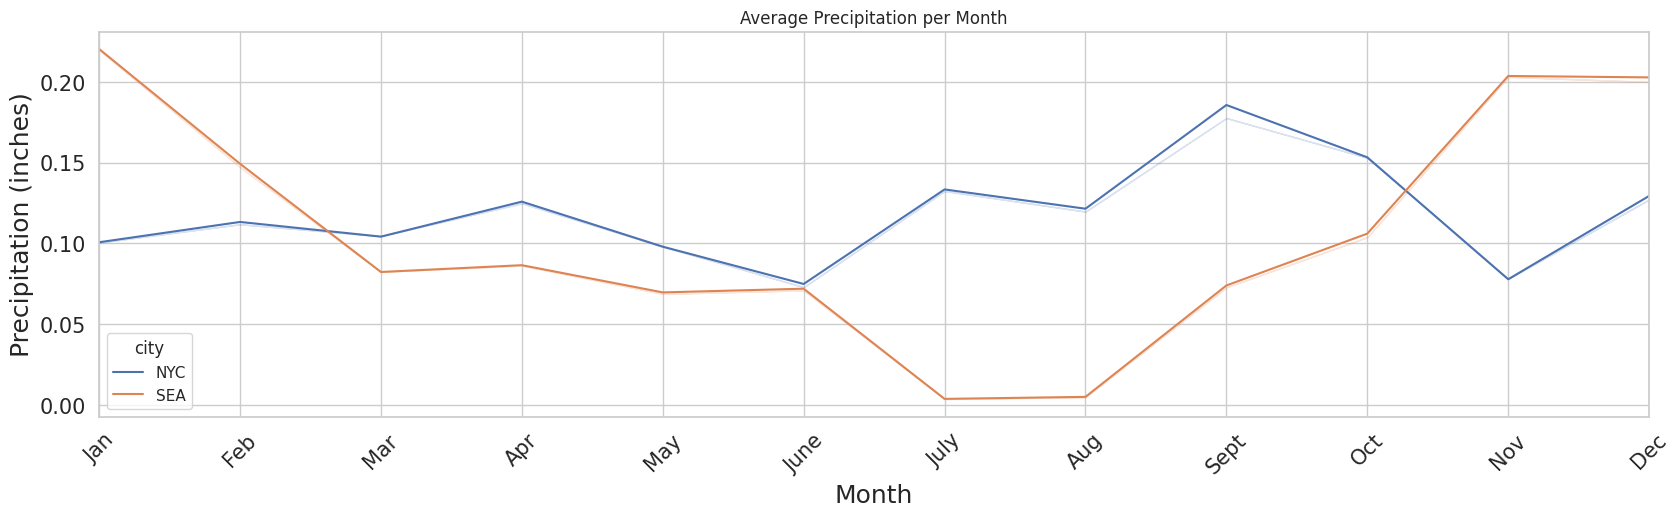

In [195]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar=('ci',False))

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlim(1, 12)
plt.tick_params(labelsize=15)
plt.title("Average Precipitation per Month")

On average by year, Seattle has a higher total amount of rainfall in the following months:
- January
- February
- November
- December

New York has a higher average amount of rainfall from March through October. (However, in June, there is only slightly more rain in New York).

Therefore, on average across all the years, New York has more rainfall from March through October. Seattle has more rainfall from November through February. So, when we only look at average rainfall for each month, it rains more in New York for most of the year.

Also, a notable trend is that Seattle has almost zero rain in July and August, while it rains a lot more in New York during those months.



### Are there more light rain events or heavy rain events in each city?

To answer this question, let's make a histogram to see how many rain events fall into each bin. The bins quantify the amount of precipitation.

#### Histogram: all the data

Text(0.5, 1.0, 'Histogram of Precipitation')

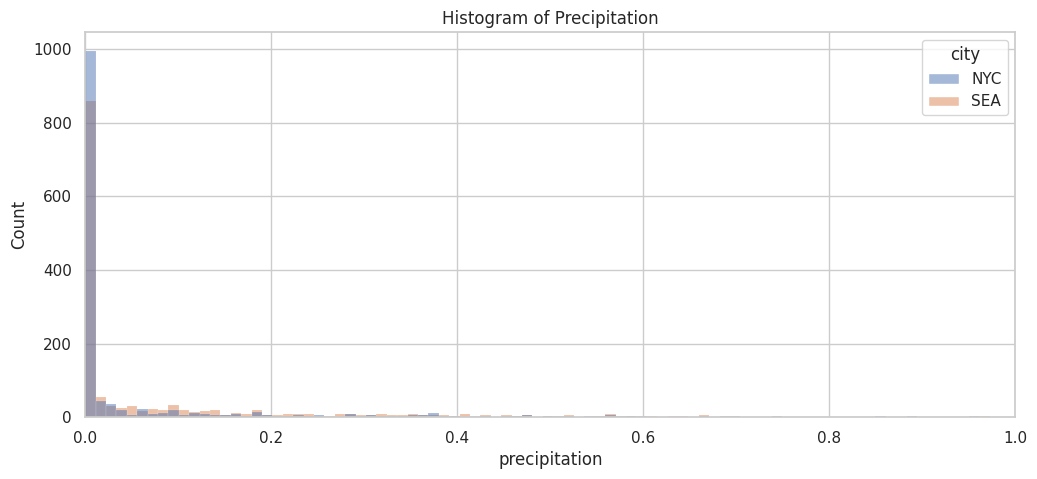

In [196]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="precipitation", hue="city", bins="auto")
plt.xlim(0, 1)
plt.title("Histogram of Precipitation")

That histogram is not very clear because most of the data falls into the first bin, which contains data where the precipitation is zero. Let's verify that most of the data has zero precipitation by looking at the DataFrame.

In [197]:
df_zero = df.loc[df["precipitation"] <= 10**-6]
print("Percentage of data with zero rainfall:", len(df_zero)/len(df)*100, "%")

Percentage of data with zero rainfall: 59.61670088980151 %


We have confirmed that a lot of the data (about 59.6%) has zero precipitation. We are trying to see a pattern on the days where it *does* rain, so let's make a histogram of just the data where there is nonzero precipitation.

Text(0.5, 1.0, 'Histogram of Precipitation')

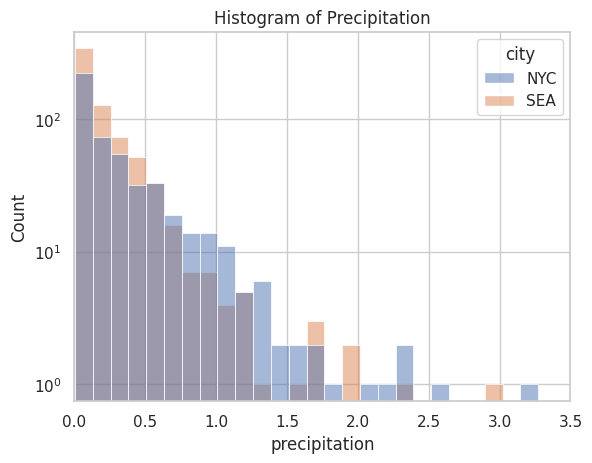

In [198]:
df_nonzero = df.loc[df["precipitation"] > 10**-6]
sns.histplot(data=df_nonzero, x="precipitation", hue="city", binwidth=.125)
plt.xlim(0,3.5)
plt.yscale('log')
plt.title("Histogram of Precipitation")

Based on the histogram, the number of light rain events (where the rainfall was less than about 0.5 inches) was higher in Seattle than in New York. The number of heavy rain events (more than 0.5 inches of rainfall) was usually higher in New York than Seattle.

#### Histogram: By month

Let's make a histogram like the one above, but for each month. That way, we will see whether the trend each month is the same as the overall trend in the histogram above.

The code cell below groups the data by month.

In [199]:
groups_by_month = df_nonzero.groupby(by='month')
months = list(groups_by_month.groups.keys())

Now, for each month group, we will make a histogram of the amount of rain in each city.

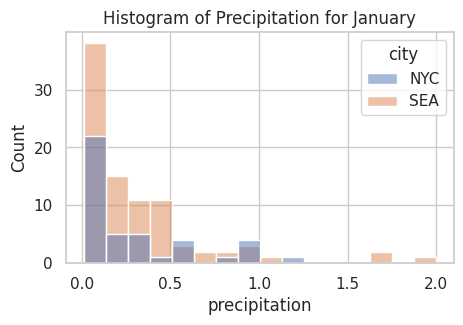

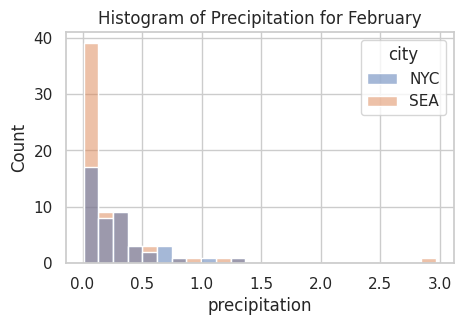

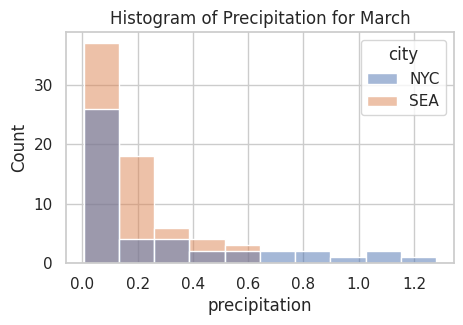

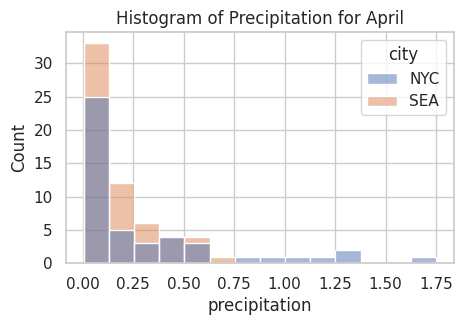

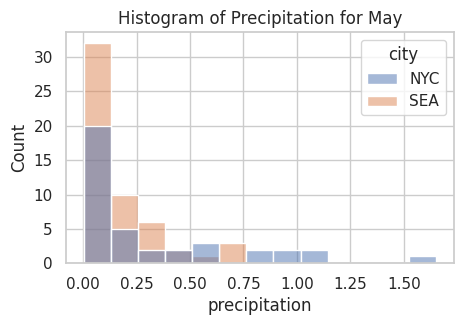

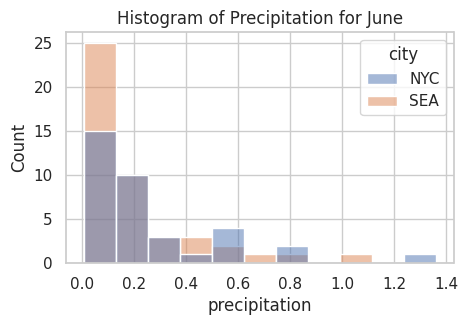

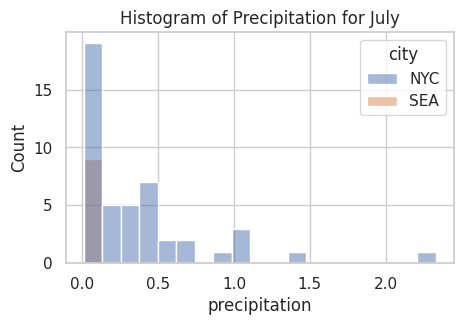

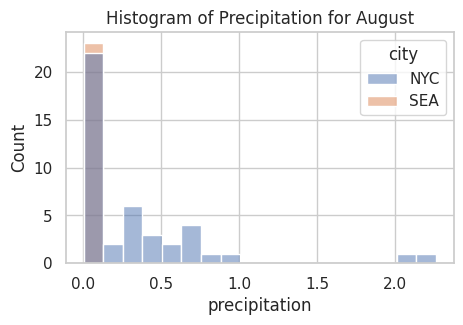

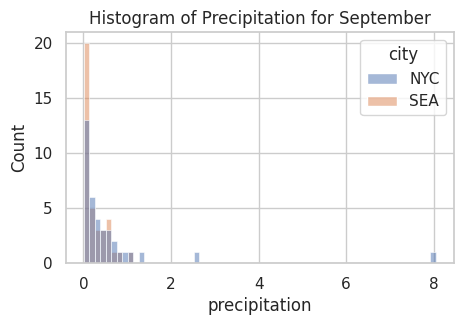

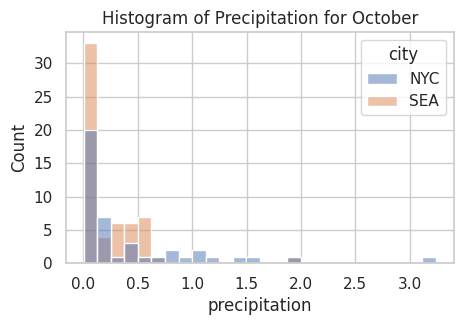

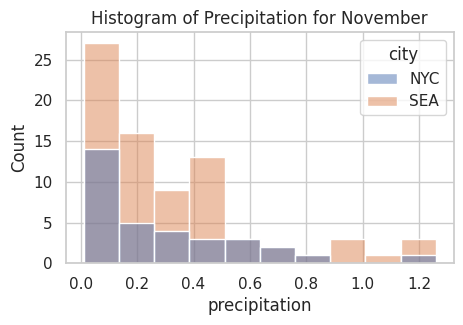

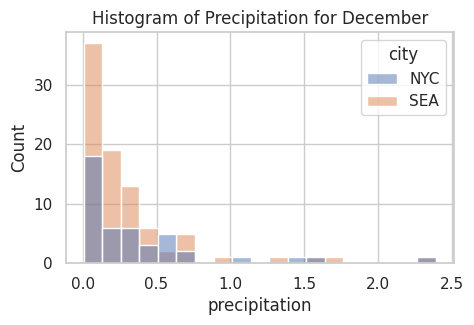

In [200]:
# We are using this dictionary to label the plots with the month name instead of the number
month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

for month in months:
  fig, ax = plt.subplots()
  fig.set_size_inches((5,3))

  # Get the DataFrame for that month
  one_month_data = groups_by_month.get_group(month)

  sns.histplot(data=one_month_data, x="precipitation", hue="city", binwidth=.125)
  plt.title("Histogram of Precipitation for " + month_dict[month])

The general trend in most of these histograms is that Seattle has more light rain events than New York. Additionally, most of the rain events Seattle are light rain. However, when it rains in New York, some rain events are light and others are heavy.

#### 2D histogram by city and month

Since 12 histograms are a lot, we will now make 2D histograms with
the month on the x-axis and the precipitation bins on the y-axis. We will make one of those for each city. That is more concise than the 12 histograms above.

There's one issue: For the September histogram in the 12 histograms above, New York had a precipitation event with 8.05 inches of rain, which was much higher than any precipitation event in Seattle. So, if we keep that rain event in New York when we make the 2D histograms, the y-axis ranges of the 2D histograms will be very different. That means we won't be able to compare the precipitation bins side by side. So, for these 2D histograms, I will remove the 8.05-inch precipitation value from New York.

Let's group the nonzero precipitation data by city and then remove the 8.05-inch precipitation event. The x axis on the histogram will be the month, and the y-axis will be the precipitation.

In [209]:
city_groups = df_nonzero.groupby(by='city')
ny_data = city_groups.get_group('NYC')
ny_data = ny_data.loc[ny_data['precipitation'] <= 8]
seattle_data = city_groups.get_group('SEA')
x_nyc = ny_data['month']
y_nyc = ny_data['precipitation']
x_seattle = seattle_data['month']
y_seattle = seattle_data['precipitation']

The two cells below plot a histogram for each city. Each grid square represents a pair of a month bin and a precipitation bin. In each grid square, the number of data points in that grid square is displayed, except for grid squares with no data points in them.

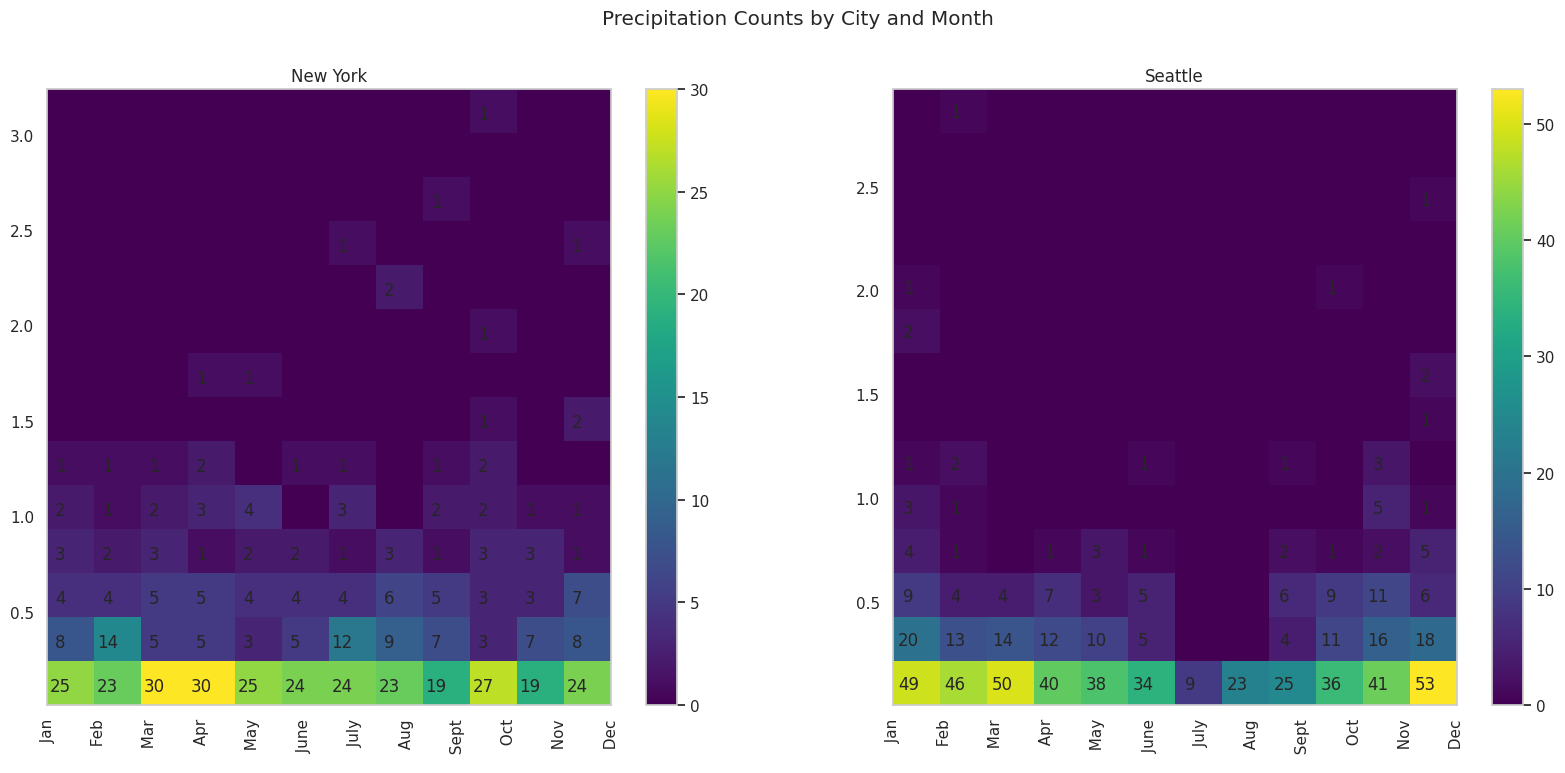

In [210]:
fig, ax = plt.subplots(1,2, sharex='col')
fig.set_size_inches((20, 8))
plt.suptitle("Precipitation Counts by City and Month")
labels=['  Jan', '  Feb', '  Mar', '  Apr', '  May', '  June', '  July', '  Aug', '  Sept', '  Oct', '  Nov', '  Dec']

# One of the things returned by hist2d() is the image, and the colorbar() method needs that image
hist, xbins, ybins, image = ax[0].hist2d(x_nyc, y_nyc, cmap='viridis', bins=[12,14])

# Put the count in each bin
for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
      coords = (xbins[j]+.25,ybins[i]+.1)
      # If there are any points in that precipitation bin, display the count of points
      if int(hist.T[i,j]) > 0:
        ax[0].text(xbins[j]+.25,ybins[i]+.1, int(hist.T[i,j]), ha="center", va="center")

plt.colorbar(image)
ax[0].set_title("New York")
ax[0].set_xticks(np.arange(12)+1)
ax[0].set_xticklabels(labels=labels, rotation=90)

hist, xbins, ybins, image = ax[1].hist2d(x_seattle, y_seattle, cmap='viridis', bins=[12,14])

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
      if int(hist.T[i,j]) > 0:
        ax[1].text(xbins[j]+.3,ybins[i]+.1, int(hist.T[i,j]), ha="center", va="center")

plt.colorbar(image)
ax[1].set_title("Seattle")
ax[1].set_xticks(np.arange(12)+1)
ax[1].set_xticklabels(labels=labels, rotation=90)

plt.show()

The 2D histograms show the same trend as the 12 histograms above. We can see this because, in Seattle, the precipitation counts in the first two precipitation bins (the bottom two rows) are high. In New York, the counts in those two bins are not as high, and New York has more data than Seattle in the higher precipitation bins.

### How many rainy days are there each month in each city?

Let's find the number of rainy days that each city had in each month. The code cell below makes a DataFrame containing the number of rainy days in each city during each month. (Note: we are counting the *total* number of rainy days for each month *in all the years*, *not* the number of rainy days for each month *every year*).

In [204]:
rainy_days_per_month = pd.DataFrame(index=pd.Index(months), columns=['num_rainy_days_ny', 'num_rainy_days_seattle'])

for month in months:
  # Get the DataFrame for that month
  one_month_data = groups_by_month.get_group(month)

  # Group the DF for that month by city
  one_month_data_by_city = one_month_data.groupby(by='city')
  counts = one_month_data_by_city['precipitation'].aggregate('count')
  rainy_days_per_month.loc[month, "num_rainy_days_ny"] = counts["NYC"]
  rainy_days_per_month.loc[month, "num_rainy_days_seattle"] = counts["SEA"]

Let's plot the number of rainy days in each city in each month (across all the years).

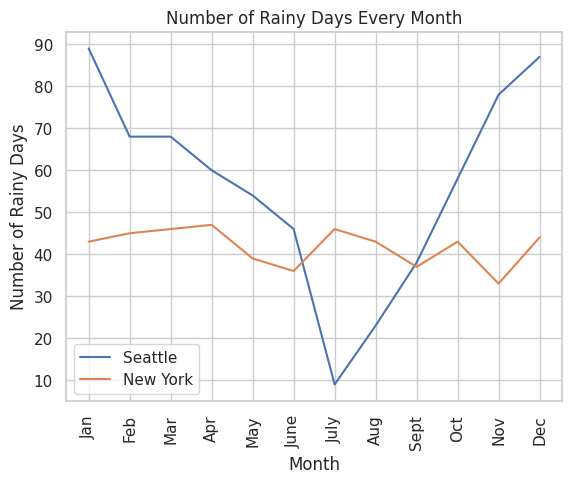

In [205]:
fig, ax = plt.subplots()
ax.plot(rainy_days_per_month.index, rainy_days_per_month['num_rainy_days_seattle'], label="Seattle")
ax.plot(rainy_days_per_month.index, rainy_days_per_month['num_rainy_days_ny'], label="New York")
plt.legend()
ax.set_ylabel("Number of Rainy Days")
ax.set_xlabel("Month")
ax.set_title("Number of Rainy Days Every Month")
plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.show()

Based on this plot, Seattle had significantly many more rainy days than New York almost every month. The exceptions to this are that New York had more rain in July and August, and both cities had about the same amount of rain in September.



## Conclusion

Seattle has a higher proportion of rain events that are light rain events. New York has more heavy rain events than Seattle. Further evidence that supports this is that the mean rainfall across all the months and years is greater in New York, and that for most months, New York has a higher mean rainfall. However, Seattle has a greater *number* of rainy days. When it rains in Seattle, though, it's more likely to be light rain and less likely to be heavy rain. New York has a smaller number of rainy days, but when it rains in New York, both light and heavy rain are likely. To summarize, it rains more often in Seattle, but heavy rain is more likely in New York than in Seattle.